<a href="https://colab.research.google.com/github/shahharsh0329/Nifty50_Classification_Using_DL/blob/main/Deep_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y build-essential wget
!apt-get install -y libta-lib0 libta-lib-dev
!wget https://github.com/mrjbq7/ta-lib/releases/download/0.4.0/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && sudo python3 setup.py install




Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
wget is already the newest version (1.21.2-2ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libta-lib0
E: Unable to locate package libta-lib-dev
--2025-02-17 18:58:00--  https://github.com/mrjbq7/ta-lib/releases/download/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/TA-Lib/ta-lib-python/releases/download/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2025-02-17 18:58:01--  https://github.com/TA-Lib/ta-lib-python/releases/download/0.4.0/ta-lib-0.4.0-src.tar.gz
Reusing existing connection to gi

In [ ]:
!pip install ta-lib

  Using cached ta_lib-0.6.3.tar.gz (376 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for ta-lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for ta-lib
Failed to build ta-lib
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (ta-lib)


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas_datareader.data import DataReader
import warnings
from datetime import datetime
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [ ]:
df = pd.read_csv('NIFTY_50.csv') ##Source File to be changed here
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,03/1/2000,1592.2,25358322,1482.15,1592.90,1482.15
1,04/1/2000,1638.7,38787872,1594.40,1641.95,1594.40
2,05/1/2000,1595.8,62153431,1634.55,1635.50,1555.05
3,06/1/2000,1617.6,51272875,1595.80,1639.00,1595.80
4,07/1/2000,1613.3,54315945,1616.60,1628.25,1597.20


In [ ]:
df.tail()

,Date,Close/Last,Volume,Open,High,Low
5348,01/7/2021,15680.00,224921644,15755.05,15755.55,15667.05
5349,02/7/2021,15722.20,254808999,15705.85,15738.35,15635.95
5350,05/7/2021,15834.35,207032153,15793.40,15845.95,15762.05
5351,06/7/2021,15818.25,391410742,15813.75,15914.20,15801.00
5352,07/7/2021,15879.65,329308646,15819.60,15893.55,15779.70


In [ ]:
df.shape

(5353, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5353 non-null   object 
 1   Close/Last  5353 non-null   float64
 2   Volume      5353 non-null   int64  
 3   Open        5353 non-null   float64
 4   High        5353 non-null   float64
 5   Low         5353 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 251.1+ KB


In [ ]:
df1 = df.iloc[:,1]
df1.head()

,Close/Last
0,1592.2
1,1638.7
2,1595.8
3,1617.6
4,1613.3


In [ ]:
df1.tail()

,Close/Last
5348,15680.00
5349,15722.20
5350,15834.35
5351,15818.25
5352,15879.65


In [ ]:
df1 = df1.replace('[\$,]', '', regex=True).astype(float)
df1.head()

,Close/Last
0,1592.2
1,1638.7
2,1595.8
3,1617.6
4,1613.3


Text(0, 0.5, 'stock price')

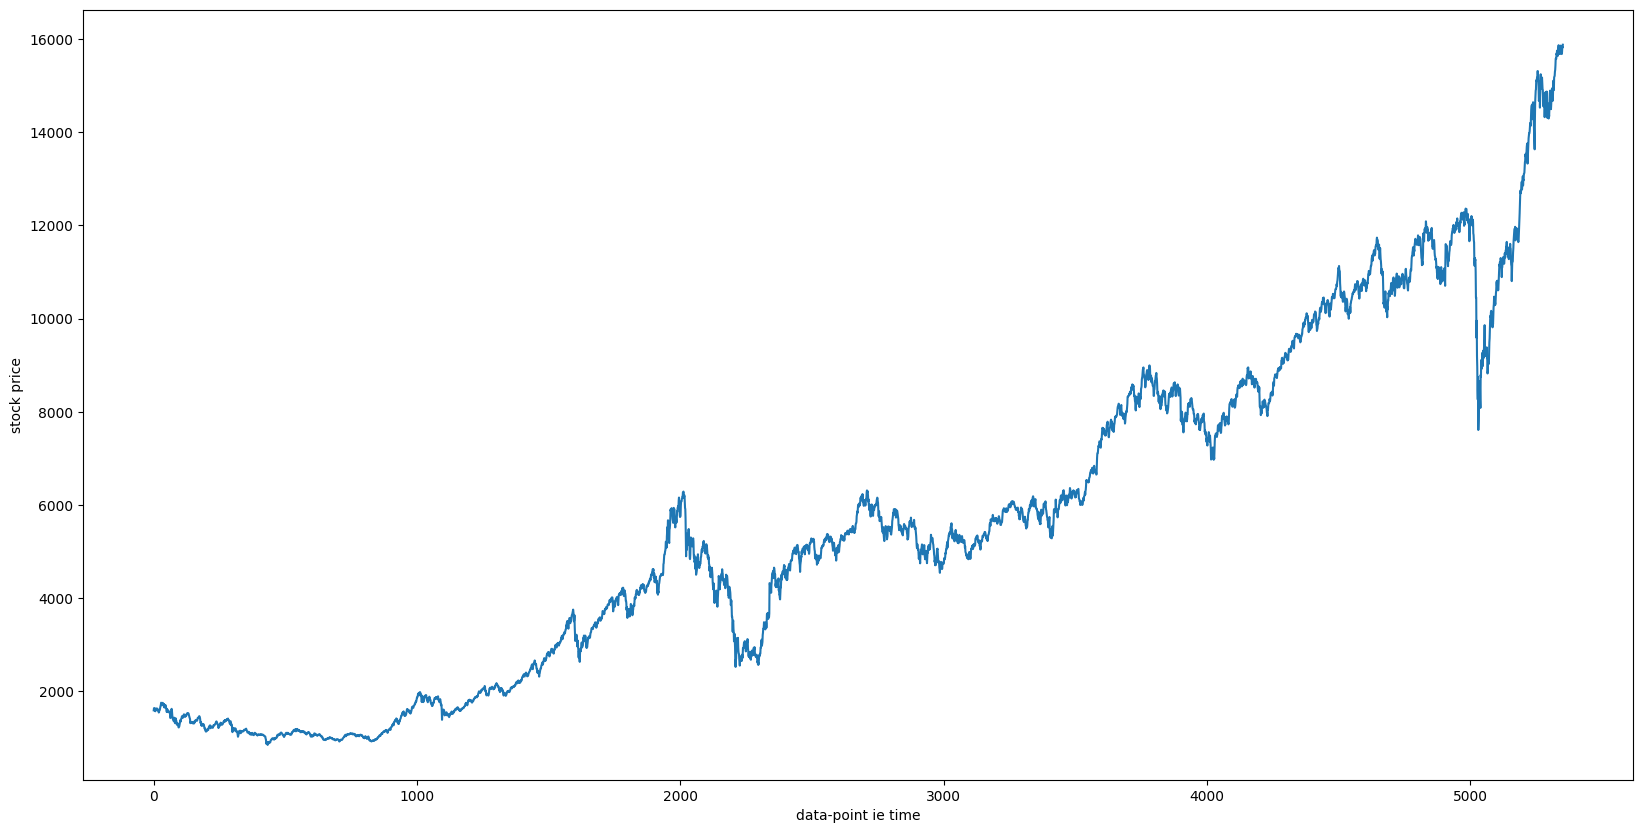

In [ ]:
plt.plot(df1)
plt.xlabel("data-point ie time")
plt.ylabel("stock price")

In [ ]:
# Define the list of Indian stock symbols (NSE or BSE)
stock_symbols = ["RELIANCE.NS", "TATASTEEL.NS", "HDFCBANK.NS", "INFY.NS"]

# Define the corresponding company names
company_names = ["Reliance Industries", "Tata Steel", "HDFC Bank", "Infosys"]

# Create an empty DataFrame to store the stock data
stock_data = pd.DataFrame()

In [ ]:
# Fetch and store data for each stock
for symbol in stock_symbols:
    stock = yf.download(symbol, start="2000-01-03", end="2021-07-07")
    stock_data[symbol] = stock["Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Print the first few rows of the stock data
print(stock_data.head())

            RELIANCE.NS  TATASTEEL.NS  HDFCBANK.NS    INFY.NS
Date                                                         
2000-01-03    11.632017      1.937794    13.939939  80.872147
2000-01-04    12.563225      1.916820    14.251536  87.241928
2000-01-05    13.055403      1.989909    13.689835  80.262695
2000-01-06    13.603032      2.138627    13.800536  73.841637
2000-01-07    14.536550      2.185658    13.804636  67.934319


In [ ]:
# Create an empty list to store DataFrames for each stock
stock_dfs = []

# Fetch and store data for each stock
for symbol in stock_symbols:
    stock = yf.Ticker(symbol)
    stock_data = stock.history(start="2000-01-03", end="2021-07-07")
    stock_data["Company"] = symbol  # Add a new column with the company's symbol
    stock_dfs.append(stock_data)

# Concatenate the DataFrames into a single DataFrame
data = pd.concat(stock_dfs, axis=0)

# Print the last few rows of the data
print(data.tail())

                                  Open         High          Low        Close  \
Date                                                                            
2021-06-30 00:00:00+05:30  1460.822096  1478.431272  1460.822096  1468.953003   
2021-07-01 00:00:00+05:30  1465.282398  1465.282398  1448.741878  1449.996338   
2021-07-02 00:00:00+05:30  1448.648759  1458.405847  1433.455601  1456.872681   
2021-07-05 00:00:00+05:30  1458.127338  1472.855874  1450.600463  1467.233887   
2021-07-06 00:00:00+05:30  1462.355281  1474.481994  1446.929810  1451.668945   

                            Volume  Dividends  Stock Splits  Company  
Date                                                                  
2021-06-30 00:00:00+05:30  6058722        0.0           0.0  INFY.NS  
2021-07-01 00:00:00+05:30  4814317        0.0           0.0  INFY.NS  
2021-07-02 00:00:00+05:30  5166064        0.0           0.0  INFY.NS  
2021-07-05 00:00:00+05:30  4058338        0.0           0.0  INFY.NS  
2021-0

In [ ]:
data3 = data.drop(['Dividends', 'Stock Splits'], axis=1)

In [ ]:
print(data3)

                                  Open         High          Low        Close  \
Date                                                                            
2000-01-03 00:00:00+05:30    10.975780    11.632017    10.975780    11.632017   
2000-01-04 00:00:00+05:30    11.941648    12.563225    11.613531    12.563225   
2000-01-05 00:00:00+05:30    11.860775    13.304958    11.860775    13.055403   
2000-01-06 00:00:00+05:30    13.355789    13.896491    13.355789    13.603032   
2000-01-07 00:00:00+05:30    13.633070    14.691367    13.540642    14.536550   
...                                ...          ...          ...          ...   
2021-06-30 00:00:00+05:30  1460.822096  1478.431272  1460.822096  1468.953003   
2021-07-01 00:00:00+05:30  1465.282398  1465.282398  1448.741878  1449.996338   
2021-07-02 00:00:00+05:30  1448.648759  1458.405847  1433.455601  1456.872681   
2021-07-05 00:00:00+05:30  1458.127338  1472.855874  1450.600463  1467.233887   
2021-07-06 00:00:00+05:30  1

In [ ]:
data3.describe()

,Open,High,Low,Close,Volume
count,21509.000000,21509.000000,21509.000000,21509.000000,2.150900e+04
mean,215.979524,218.445576,213.313526,215.867745,3.278891e+07
std,288.118322,290.926097,284.984507,287.937046,4.484970e+07
min,0.900174,0.949956,0.900174,0.917223,0.000000e+00
25%,18.488409,18.739961,18.168812,18.477762,6.490850e+06
50%,105.422575,107.648409,102.963378,105.676888,1.573568e+07
75%,272.905652,276.256577,269.819031,272.782410,4.233043e+07
max,1556.317241,1575.324864,1544.077514,1561.549194,6.428460e+08


# **Exploratory Data Analysis**

**Overview of 4 companies**

ConversionError: Failed to convert value(s) to axis units: '2021-07-07'

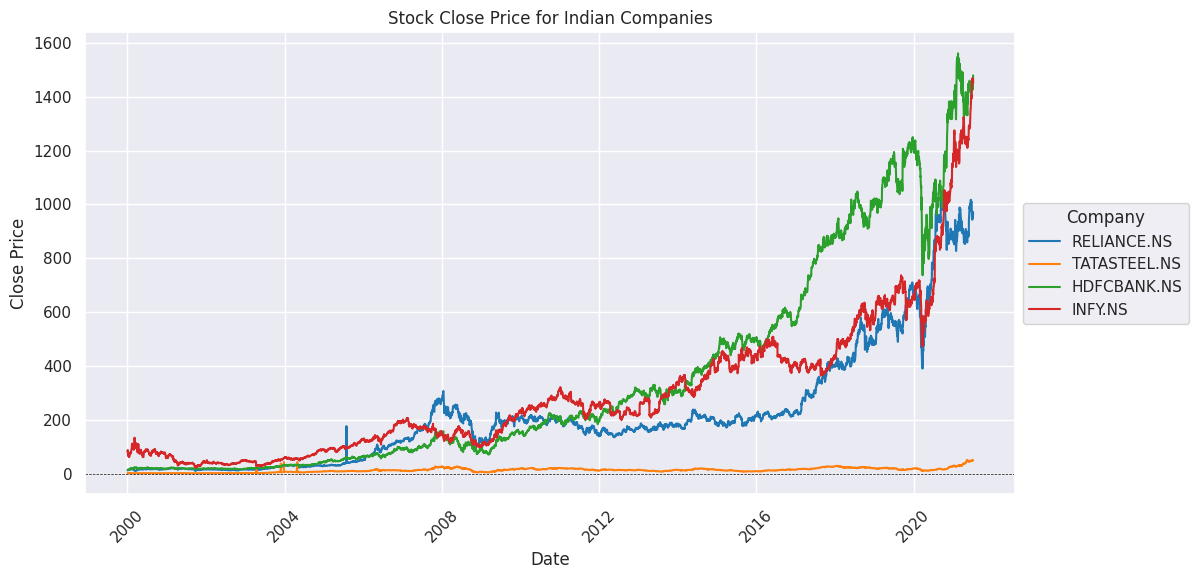

In [ ]:
# Set the style for the plot
sns.set(style="darkgrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the close prices for each company
ax = sns.lineplot(
    x=data.index,
    y="Close",
    data=data,
    hue="Company",
    palette="tab10"
)

# Set titles and labels
ax.set(
    title="Stock Close Price for Indian Companies",
    xlabel="Date",
    ylabel="Close Price"
)

# Display the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Company')

# Rotate x-axis labels
plt.xticks(rotation=45)

# grid lines
ax.grid(True)

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)

# horizontal line at y=0 for reference
plt.axvline("2021-07-07", color='red', linestyle='--', linewidth=0.5, label='Today')

# plot
plt.tight_layout()
plt.show()

**Adjusted Close Price for Each Stock**

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Company'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Company'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Company'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Company'],
      dtype='object')


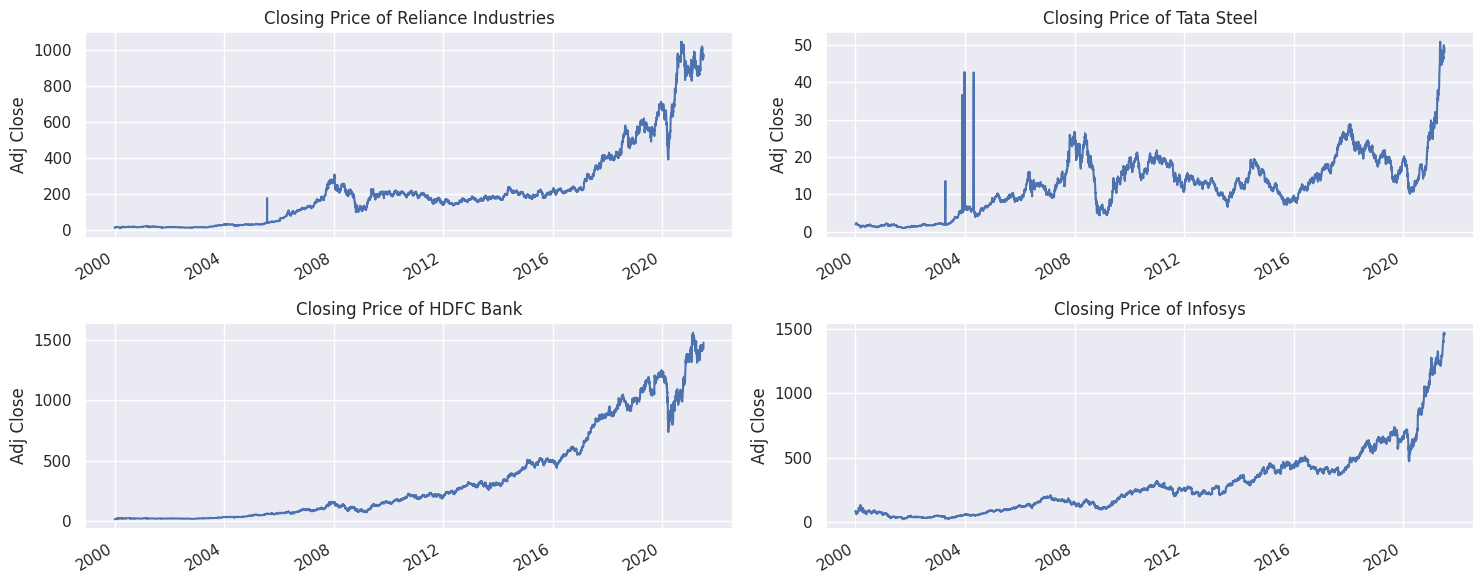

In [ ]:
# Create subplots
num_companies = len(stock_dfs)
num_cols = 2
num_rows = int(np.ceil(num_companies / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=0.8)

for i, (ax, stock_df, company_name) in enumerate(zip(axes.flatten(), stock_dfs, company_names), 1):

    print(stock_df.columns)

    # Update the column name based on the actual column name
    column_name = "Close"

    stock_df[column_name].plot(ax=ax)
    ax.set_ylabel("Adj Close")
    ax.set_xlabel(None)
    ax.set_title(f"Closing Price of {company_name}")

# Hide any empty subplots
for i in range(num_companies, num_cols * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

**Total Volume of Stock Traded Each Day**

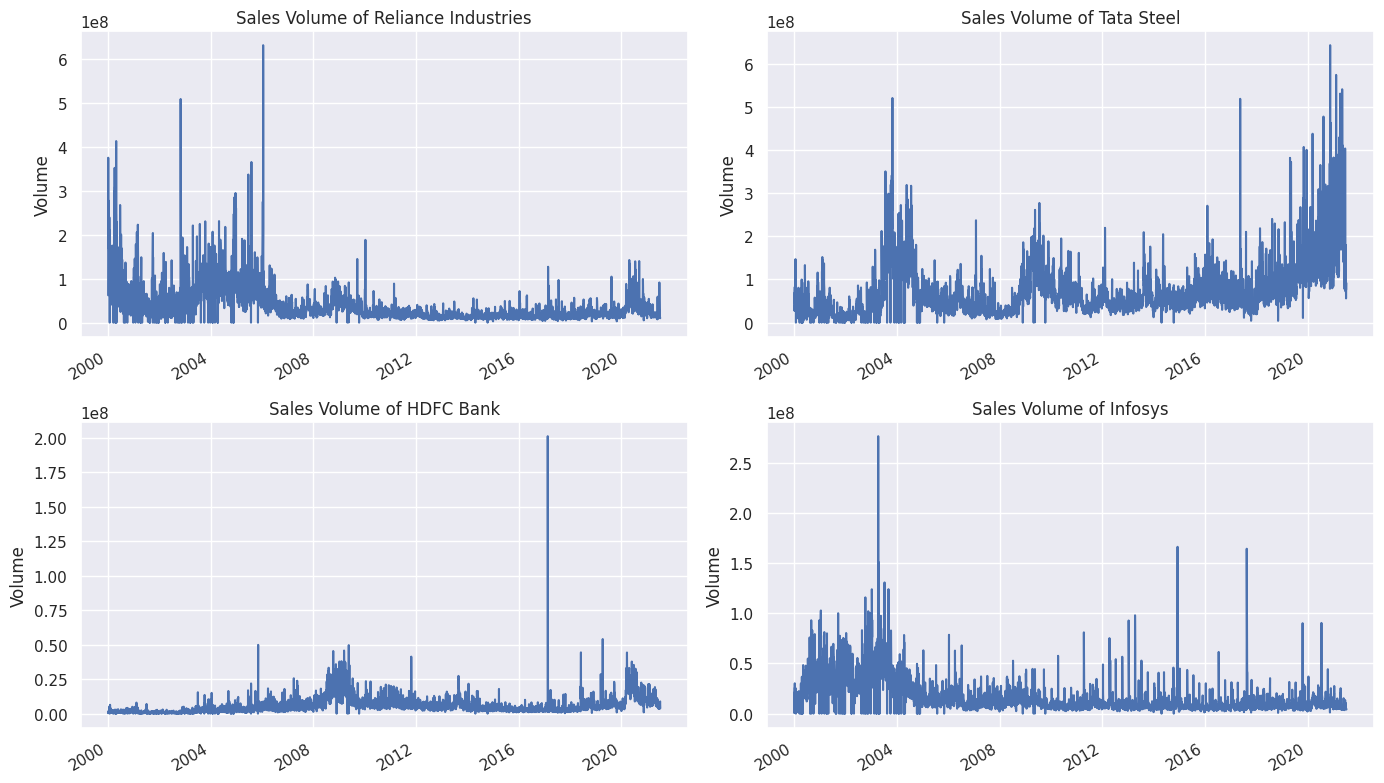

In [ ]:
num_companies = len(stock_dfs)
num_cols = 2
num_rows = int(np.ceil(num_companies / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 8))
plt.subplots_adjust(top=1.75, bottom=0.8)

for i, (ax, stock_df, company_name) in enumerate(zip(axes.flatten(), stock_dfs, company_names), 1):
    stock_df["Volume"].plot(ax=ax)
    ax.set_ylabel("Volume")
    ax.set_xlabel(None)
    ax.set_title(f"Sales Volume of {company_name}")

# Hide any empty subplots
for i in range(num_companies, num_cols * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

**Moving Average of Each Stock**

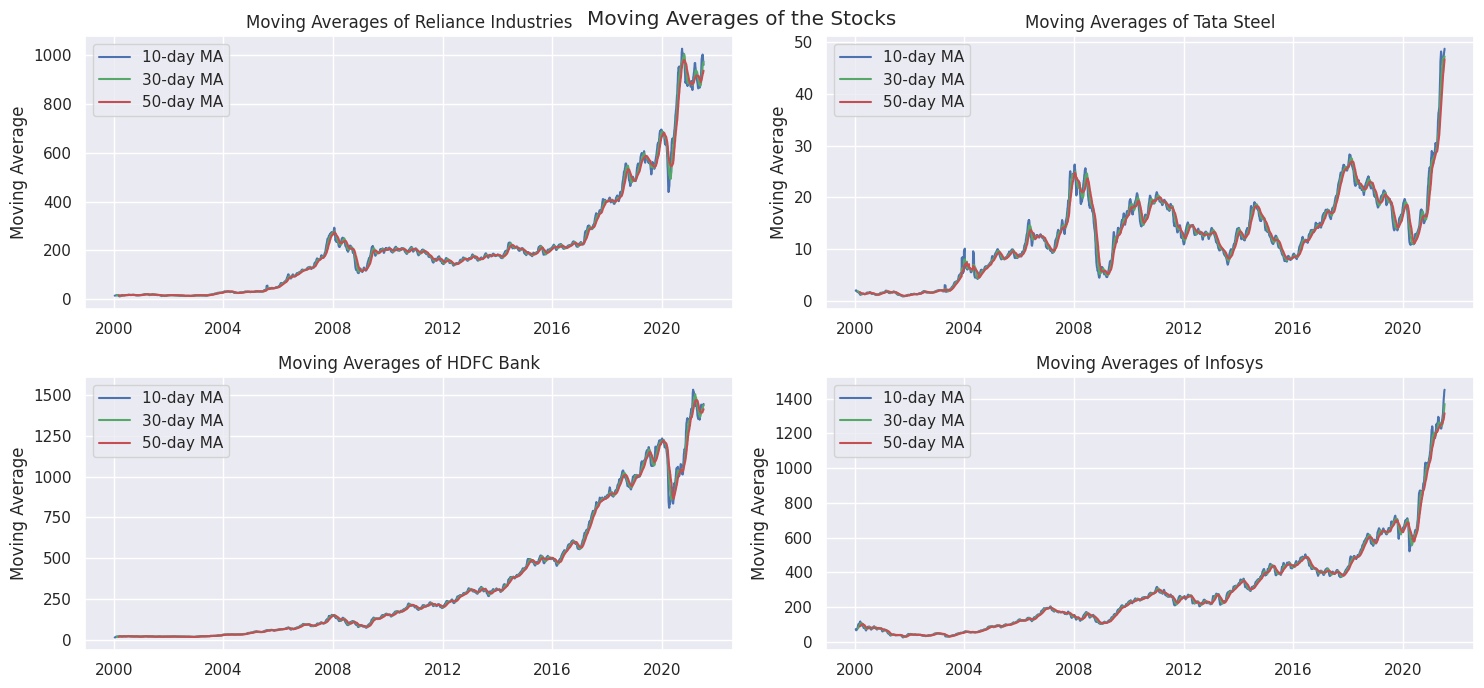

In [ ]:
# Define the moving averages and line colors
moving_averages = [10, 30, 50]
line_colors = ['b', 'g', 'r']

# Create subplots
num_companies = len(stock_dfs)
num_cols = 2
num_rows = int(np.ceil(num_companies / num_cols))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=0.8)

for i, (ax, stock_df, company_name) in enumerate(zip(axes.flatten(), stock_dfs, company_names), 1):
    for ma, color in zip(moving_averages, line_colors):
        ma_col = f"MA for {ma} days"

        # Check if the column name exists in the DataFrame
        if "Close" in stock_df.columns:
            stock_df[ma_col] = stock_df["Close"].rolling(ma).mean()
            sns.lineplot(
                x=stock_df.index,
                y=stock_df[ma_col],
                data=stock_df,
                ax=ax,
                label=f"{ma}-day MA",
                color=color,
            )
        else:
            print(f"Closing price data not found for {company_name}")

    ax.set(
        title=f"Moving Averages of {company_name}",
        xlabel=None,
        ylabel="Moving Average",
    )

# Hide any empty subplots
for i in range(num_companies, num_cols * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.suptitle("Moving Averages of the Stocks")
plt.legend()
plt.show()

**Daily Returns**

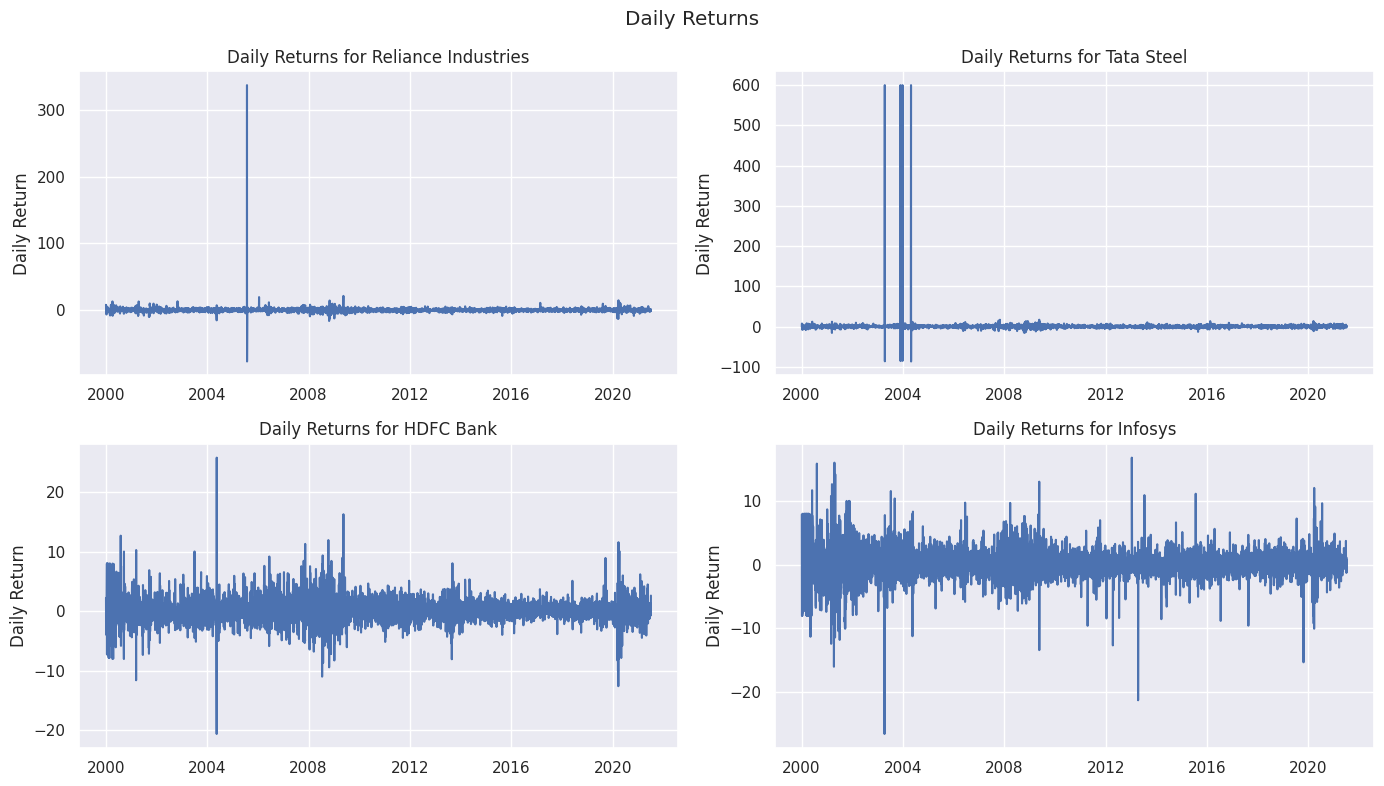

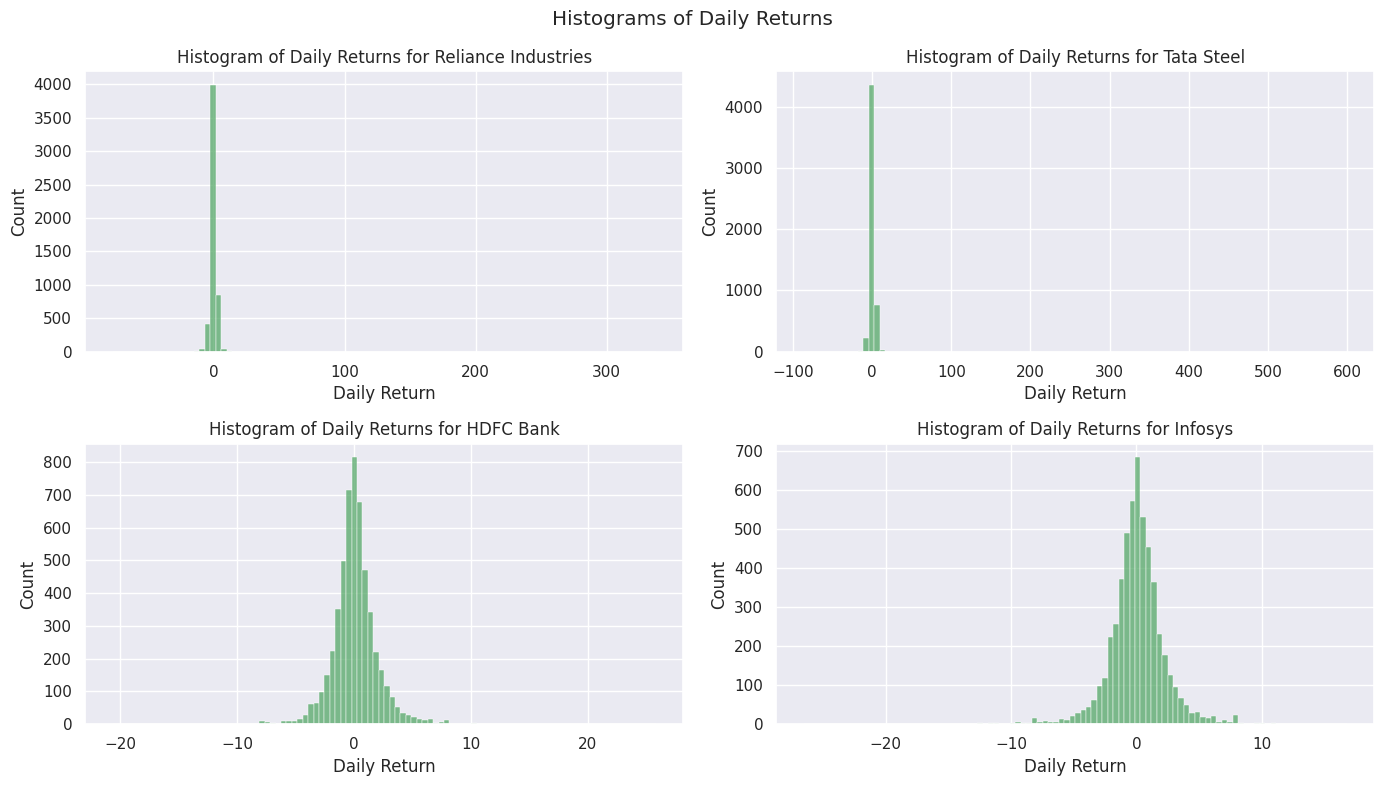

In [ ]:
# daily returns for each stock
for stock_df in stock_dfs:
    stock_df["Daily Return"] = stock_df["Close"].pct_change() * 100  # Calculate daily returns in percentage

# subplots
plt.figure(figsize=(14, 8))
plt.subplots_adjust(top=1.75, bottom=0.8)

for i, stock_df in enumerate(stock_dfs, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(
        x=stock_df.index,
        y="Daily Return",
        data=stock_df,
        color='b',
    )
    plt.title(f"Daily Returns for {company_names[i-1]}")
    plt.xlabel(None)
    plt.ylabel("Daily Return")

plt.suptitle("Daily Returns")
plt.tight_layout()

plt.figure(figsize=(14, 8))
plt.subplots_adjust(top=1.75, bottom=0.8)

for i, stock_df in enumerate(stock_dfs, 1):
    plt.subplot(2, 2, i)
    sns.histplot(
        stock_df["Daily Return"].dropna(),
        bins=100,
        color='g',
    )
    plt.title(f"Histogram of Daily Returns for {company_names[i-1]}")

plt.suptitle("Histograms of Daily Returns")
plt.tight_layout()

plt.show()

**Data Collection**

In [3]:
import yfinance as yf
import pandas as pd
import time

# List of Nifty 50 stock tickers
nifty50_tickers = [
    "RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "INFY.NS", "ICICIBANK.NS",
    "HINDUNILVR.NS", "SBIN.NS", "BAJFINANCE.NS", "BHARTIARTL.NS", "KOTAKBANK.NS",
    "ITC.NS", "LT.NS", "AXISBANK.NS", "ASIANPAINT.NS", "MARUTI.NS",
    "HCLTECH.NS", "TITAN.NS", "ULTRACEMCO.NS", "NTPC.NS", "SUNPHARMA.NS",
    "TATASTEEL.NS", "POWERGRID.NS", "INDUSINDBK.NS", "WIPRO.NS", "NESTLEIND.NS",
    "JSWSTEEL.NS", "TECHM.NS", "ONGC.NS", "ADANIENT.NS", "COALINDIA.NS",
    "ADANIPORTS.NS", "TATAMOTORS.NS", "GRASIM.NS", "BAJAJFINSV.NS", "CIPLA.NS",
    "M&M.NS", "HDFCLIFE.NS", "EICHERMOT.NS", "APOLLOHOSP.NS", "HEROMOTOCO.NS",
    "BPCL.NS", "DIVISLAB.NS", "BAJAJ-AUTO.NS", "BRITANNIA.NS", "DRREDDY.NS",
    "SBILIFE.NS", "HINDALCO.NS", "UPL.NS", "TATACONSUM.NS", "ICICIPRULI.NS"
]

# Set date range (10 years)
start_date = "2014-03-07"
end_date = "2024-03-07"

# Create an empty DataFrame
final_df = pd.DataFrame()

# Fetch data for each stock
for ticker in nifty50_tickers:
    try:
        print(f"📌 Fetching data for {ticker}...")

        # Download stock data
        data = yf.download(ticker, start=start_date, end=end_date, interval="1d", auto_adjust=False)

        # If no data is found, skip this stock
        if data.empty:
            print(f"⚠️ No data found for {ticker}, skipping...")
            continue

        # Keep only required columns & rename them
        data = data[['Open', 'Close', 'High', 'Low', 'Volume']]

        # Reset index to get "Date" as a column
        data.reset_index(inplace=True)

        # Add "Stock (Ticker)" column
        data.insert(1, "Stock (Ticker)", ticker)

        # Append data to final DataFrame
        final_df = pd.concat([final_df, data], ignore_index=True)

        # Pause to prevent API blocking
        time.sleep(2)

    except Exception as e:
        print(f"❌ Error fetching {ticker}: {e}")

# Save to CSV
if not final_df.empty:
    final_df.to_csv("nifty50_clean_data.csv", index=False)
    print("✅ Data saved as 'nifty50_clean_data.csv'")
    print(final_df.head())  # Print first few rows
else:
    print("❌ No data collected.")


📌 Fetching data for RELIANCE.NS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

📌 Fetching data for TCS.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for HDFCBANK.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for INFY.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for ICICIBANK.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for HINDUNILVR.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for SBIN.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for BAJFINANCE.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for BHARTIARTL.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for KOTAKBANK.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for ITC.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for LT.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for AXISBANK.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for ASIANPAINT.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for MARUTI.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for HCLTECH.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for TITAN.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for ULTRACEMCO.NS...


📌 Fetching data for NTPC.NS...


[*********************100%***********************]  1 of 1 completed


📌 Fetching data for SUNPHARMA.NS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

📌 Fetching data for TATASTEEL.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for POWERGRID.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for INDUSINDBK.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for WIPRO.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for NESTLEIND.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for JSWSTEEL.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for TECHM.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for ONGC.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for ADANIENT.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for COALINDIA.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for ADANIPORTS.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for TATAMOTORS.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for GRASIM.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for BAJAJFINSV.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for CIPLA.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for M&M.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for HDFCLIFE.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for EICHERMOT.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for APOLLOHOSP.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for HEROMOTOCO.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for BPCL.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for DIVISLAB.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for BAJAJ-AUTO.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for BRITANNIA.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for DRREDDY.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for SBILIFE.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for HINDALCO.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for UPL.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for TATACONSUM.NS...



[*********************100%***********************]  1 of 1 completed

📌 Fetching data for ICICIPRULI.NS...


✅ Data saved as 'nifty50_clean_data.csv'
Price        Date Stock (Ticker)        Open       Close        High  \
Ticker                           RELIANCE.NS RELIANCE.NS RELIANCE.NS   
0      2014-03-07    RELIANCE.NS  188.581116  198.730209  199.781693   
1      2014-03-10    RELIANCE.NS  197.747314  202.398972  206.559189   
2      2014-03-11    RELIANCE.NS  202.296112  199.953140  202.936142   
3      2014-03-12    RELIANCE.NS  199.781693  199.175949  201.816086   
4      2014-03-13    RELIANCE.NS  200.010284  201.050339  204.524796   

Price          Low      Volume   Open  Close   High  ...          Open  \
Ticker RELIANCE.NS RELIANCE.NS TCS.NS TCS.NS TCS.NS  ... TATACONSUM.NS   
0       188.581116  33597187.0    NaN    NaN    NaN  ...           NaN   
1       197.358719  32869474.0    NaN    NaN    NaN  ...           NaN   
2       199.347397  12780183.0    NaN    NaN    NaN  ...           NaN   
3       198.330200   9431389.0    NaN    NaN    NaN  ...           NaN   
4       19

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/nifty50_historical_data.csv')

# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Sort values by date
df = df.sort_values(by="Date")

# Extract features
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["DayOfWeek"] = df["Date"].dt.dayofweek  # Monday=0, Sunday=6

# Convert to Unix timestamp (numeric format)
df["Timestamp"] = df["Date"].astype("int64") // 10**9

# Save cleaned dataset
cleaned_file_path = "/content/cleaned_nifty50_data.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"✅ Data cleaned and saved at: {cleaned_file_path}")

✅ Data cleaned and saved at: /content/cleaned_nifty50_data.csv
